# Narrow wells

A particularly nasty issue in optimisation problems are narrow wells. This means points
in parameter space that are highly optimal, but where small changes in the parameter
changes the outcome to be less favourable.

Lets get one of these, and see how well ProcessOptmizer handles it.

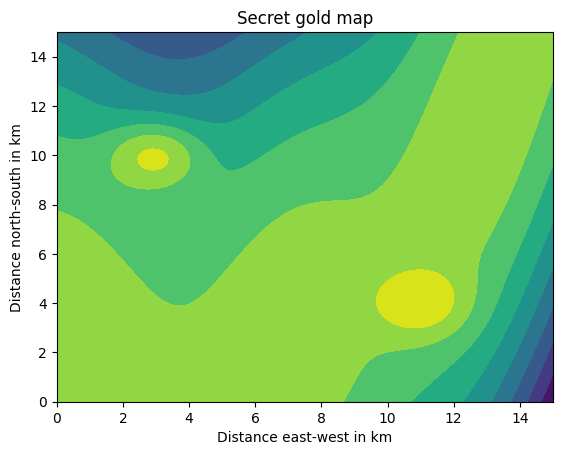

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import ProcessOptimizer
from ProcessOptimizer.model_systems import get_model_system

gold_map_with_wells = get_model_system("gold_map_with_wells")

x_list = np.linspace(*gold_map_with_wells.space.dimensions[0].bounds,100)
y_list = np.linspace(*gold_map_with_wells.space.dimensions[0].bounds,100)

(x_mesh,y_mesh) = np.meshgrid(x_list,y_list)
score_mesh = [[-gold_map_with_wells.get_score((x,y)) for (x,y) in zip(x_vec,y_vec)] 
              for (x_vec,y_vec) in zip(x_mesh,y_mesh)]
plot = plt.contourf(x_mesh,y_mesh,score_mesh,10)
plot.axes.set_xlabel("Distance east-west in km")
plot.axes.set_ylabel("Distance north-south in km")
plot.axes.set_title("Secret gold map");

Here, we are using the same gold map we have used so far, but have added two small,
highly favourable areas.

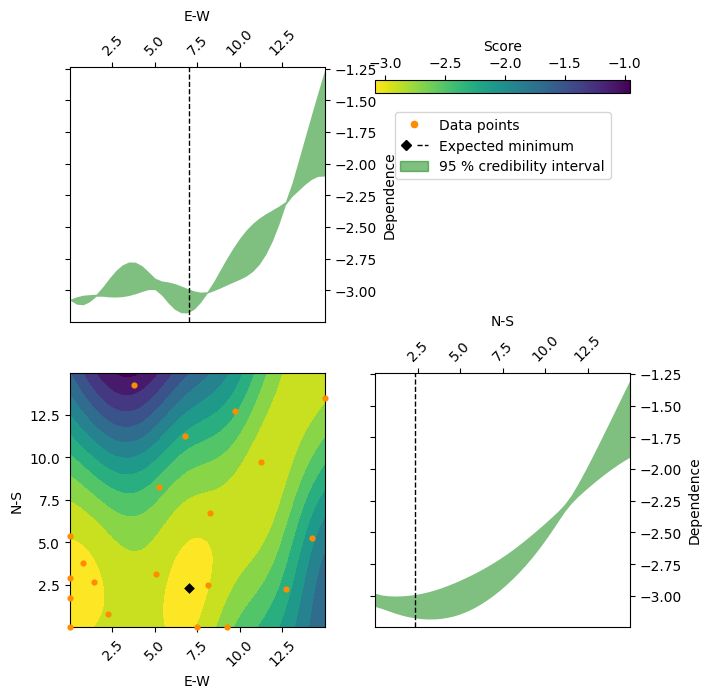

In [2]:
# Starting the ProcessOptmizer, and telling it about our plot of land
opt = ProcessOptimizer.Optimizer(dimensions=gold_map_with_wells.space.dimensions)
for i in range(20):
    # Ask the ProcessOptimizer to suggest a point to try
    next_point = opt.ask()
    # Get the score for that point from our gold map
    score = gold_map_with_wells.get_score(next_point)
    # Tell the ProcessOptimizer about the score
    result=opt.tell(next_point, score)
# Plot the final model
ProcessOptimizer.plot_objective(result=result,pars="expected_minimum",dimensions = ["E-W","N-S"]);


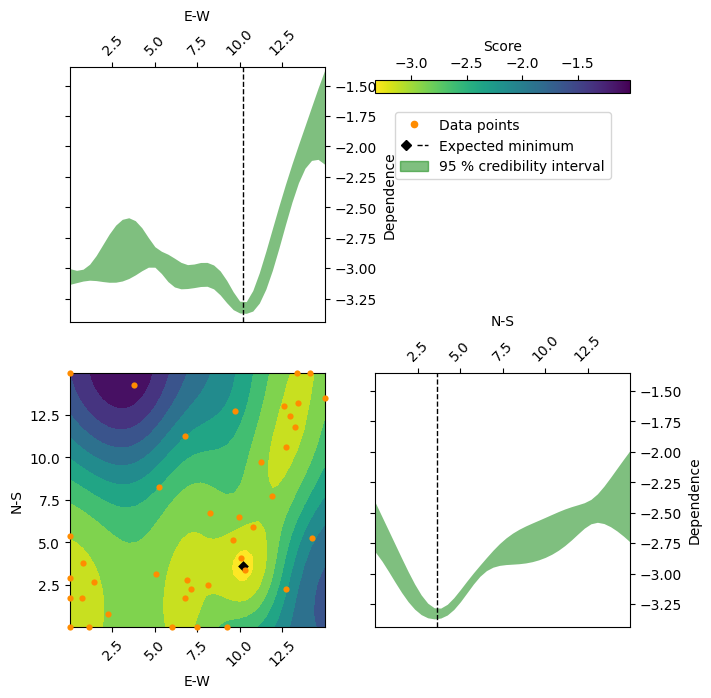

In [3]:
for i in range(20):
    # Ask the ProcessOptimizer to suggest a point to try
    next_point = opt.ask()
    # Get the score for that point from our gold map
    score = gold_map_with_wells.get_score(next_point)
    # Tell the ProcessOptimizer about the score
    result=opt.tell(next_point, score)
# Plot the final model
ProcessOptimizer.plot_objective(result=result,pars="expected_minimum",dimensions = ["E-W","N-S"]);
